In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
import own_PCA

Part 1

In [3]:
#Read the pca_dataset
#Source: stackoverflow
filename = 'data_task_1/pca_dataset.txt'
array = []

try:
    with open(filename, 'r') as current_file:
        # Reads each line of the file, and creates a 1d list of each point
        for line in current_file.readlines():
            point = line.split(' ')
            x = np.float32(point[0])
            y = np.float32(point[1])
            point_as_array = [x, y]
            array.append(point_as_array)
except IOError:
    print("Something went wrong when attempting to read file.")

array = np.array(array)

In [4]:
center, centered_array, U, sigma, Sigma, Vh, energy, explained_variance = own_PCA.perform_PCA(array)

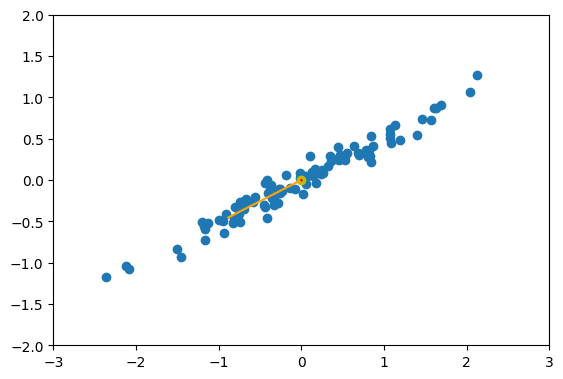

In [5]:
#make the axis ratio 1:1
ax = plt.gca()
ax.set_aspect(1)

#display the scatter CENTERED points
plt.scatter(centered_array[:, 0], centered_array[:, 1])
#display the center
plt.plot(0, 0, 'yo')

#display the principal components SCALED
scalePC = True

if scalePC:
    plt.plot([0,Vh.T[0][0]* energy[0]], [0,Vh.T[1][0] * energy[0]], 'orange')
    plt.plot([0,Vh.T[0][1]* energy[1]], [0,Vh.T[1][1] * energy[1]] , 'red')
else:
    plt.plot([0,Vh.T[0][0]], [0,Vh.T[1][0]], 'orange')
    plt.plot([0,Vh.T[0][1]], [0,Vh.T[1][1]] , 'red')

#Fix the boundaries
plt.xlim((-3, 3))
plt.ylim((-2, 2))

#Show the plot
plt.show()

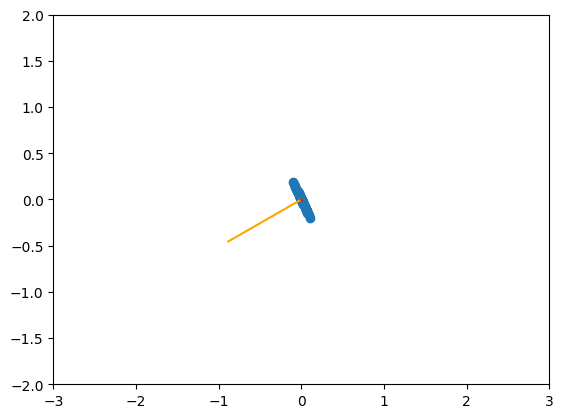

In [6]:
#Reconstruction with only the second PC (the one with the lowest energy)

#Create another Sigma where we remove the first component
newSigma = Sigma.copy()
newSigma[:,0] = np.zeros(Sigma.shape[0])

#Reconstruct without the first component
reconstruction_array = own_PCA.reconstruct_PCA(U, newSigma, Vh)

#Plot the new projection
plt.scatter(reconstruction_array [:, 0], reconstruction_array [:, 1])

#display the principal components SCALED
scalePC = True

if scalePC:
    plt.plot([0,Vh.T[0][0]* energy[0]], [0,Vh.T[1][0] * energy[0]], 'orange')
    plt.plot([0,Vh.T[0][1]* energy[1]], [0,Vh.T[1][1] * energy[1]] , 'red')
else:
    plt.plot([0,Vh.T[0][0]], [0,Vh.T[1][0]], 'orange')
    plt.plot([0,Vh.T[0][1]], [0,Vh.T[1][1]] , 'red')

#Fix the boundaries
plt.xlim((-3, 3))
plt.ylim((-2, 2))
plt.show()

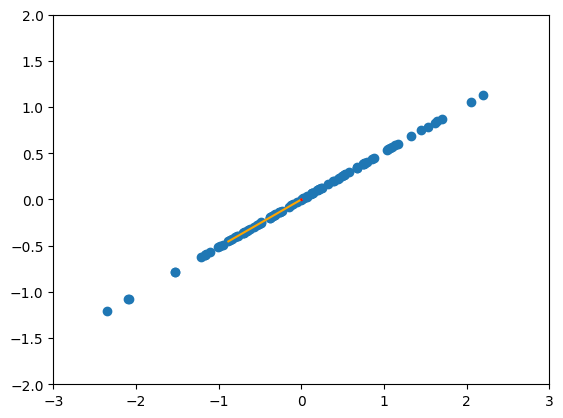

In [7]:
#Reconstruction with only the first PC (the one with the highest energy)

#Create another Sigma where we remove the second component
newSigma = Sigma.copy()
newSigma[:,1] = np.zeros(Sigma.shape[0])

#Reconstruct without the first component
reconstruction_array = own_PCA.reconstruct_PCA(U, newSigma, Vh)


#Plot the new projection
plt.scatter(reconstruction_array [:, 0], reconstruction_array [:, 1])

#display the principal components SCALED
scalePC = True

if scalePC:
    plt.plot([0,Vh.T[0][0]* energy[0]], [0,Vh.T[1][0] * energy[0]], 'orange')
    plt.plot([0,Vh.T[0][1]* energy[1]], [0,Vh.T[1][1] * energy[1]] , 'red')
else:
    plt.plot([0,Vh.T[0][0]], [0,Vh.T[1][0]], 'orange')
    plt.plot([0,Vh.T[0][1]], [0,Vh.T[1][1]] , 'red')

#Fix the boundaries
plt.xlim((-3, 3))
plt.ylim((-2, 2))
plt.show()

In [8]:
#Present the energies contained in the principal components
energy

array([0.9931426 , 0.00685734], dtype=float32)

In [9]:
#Present how much energy is preserved in the first i components
explained_variance

array([0.99314266, 1.        ], dtype=float32)

Part 2

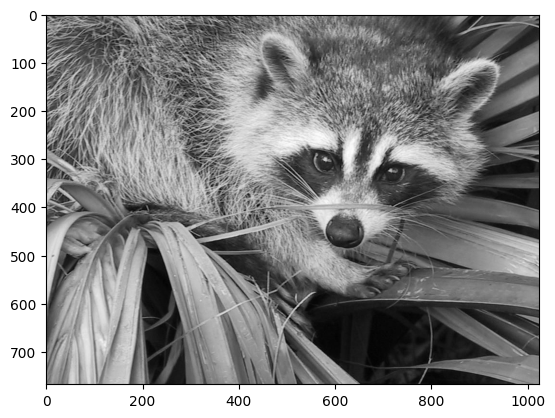

(768, 1024)

In [10]:
#Getting the image
image = scipy.misc.face(gray=True)

#Printing the image as a gray scale image
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
image.shape

(249, 185)


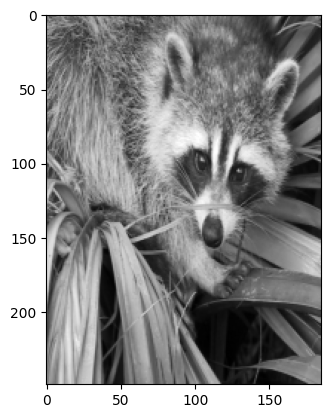

In [11]:
#Resizing the image as requested in the sheet
image_resized = resize(image, (249, 185))

#Printing the image as a gray scale image
print(image_resized.shape)
plt.imshow(image_resized, cmap=plt.cm.gray)
plt.show()

In [12]:
#Performing PCA on the image
image_center, image_centered, U, sigma, Sigma, Vh, energy, explained_variance = own_PCA.perform_PCA(image_resized)

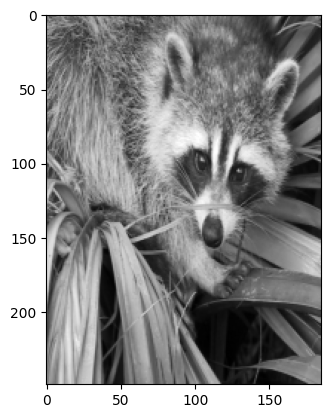

1.0


In [13]:
#(a) Perform PCA for the first 'a' = 185 components (all)
a = 185

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

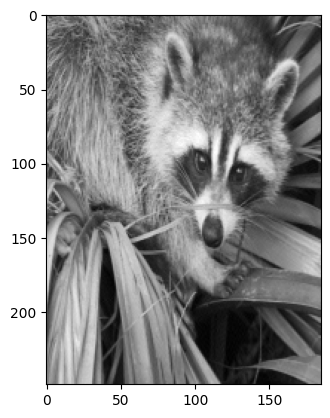

0.9980186234966039


In [14]:
#(b) Perform PCA for the first 'a' = 120 components
a = 120

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

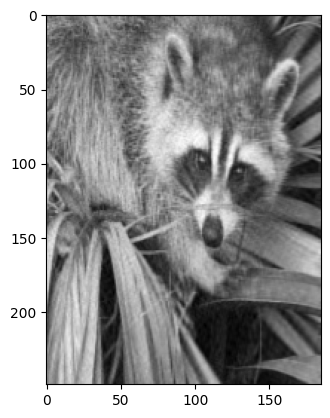

0.9751699093550324


In [15]:
#(c) Perform PCA for the first 'a' = 50 components
a = 50

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

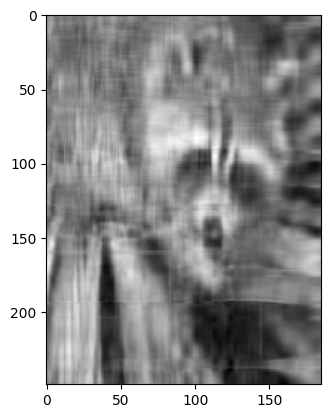

0.8239561688687495


In [16]:
#(d) Perform PCA for the first 'a' = 10 components
a = 10

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

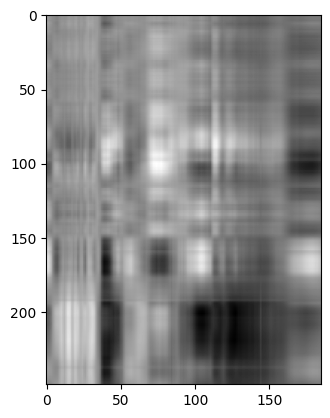

0.4667452698060739


In [17]:
#(d*) Perform PCA for the first 'a' = 2 components
a = 2

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

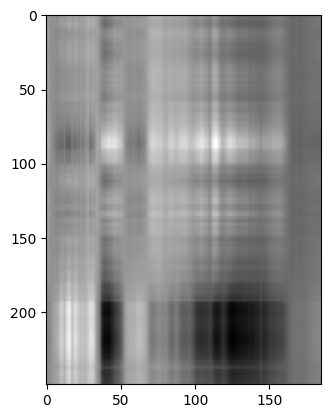

0.3195558892625528


In [18]:
#(d**) Perform PCA for the first 'a' = 1 components
a = 1

#Keeping only the first "a" principal components
new_image = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_image = own_PCA.recenter_data(new_image, image_center)

#Plotting the new image
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#How much energy do we have now
print(explained_variance[a-1])

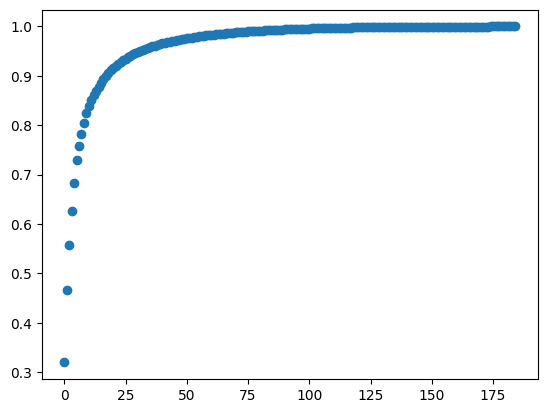

array([0.31955589, 0.46674527, 0.55728777, 0.62678179, 0.68319326,
       0.72864871, 0.75719863, 0.78181837, 0.80540467, 0.82395617,
       0.83936852, 0.85098044, 0.86082919, 0.86999165, 0.87831148,
       0.88604822, 0.89332323, 0.89994674, 0.90571091, 0.91135224,
       0.91617976, 0.92070601, 0.9245803 , 0.9281041 , 0.93152305,
       0.93483826, 0.93783799, 0.94073264, 0.9432731 , 0.94573443,
       0.94797589, 0.95017453, 0.95232442, 0.95440367, 0.95626072,
       0.95800548, 0.95970271, 0.96130693, 0.9627919 , 0.964201  ,
       0.96553885, 0.96683346, 0.96804837, 0.96919126, 0.97025764,
       0.97128799, 0.97229681, 0.97327866, 0.9742345 , 0.97516991,
       0.97606078, 0.97689221, 0.97766782, 0.97843609, 0.9791584 ,
       0.97986368, 0.98055498, 0.98120337, 0.98184696, 0.98247469,
       0.98307838, 0.98365045, 0.98420888, 0.98474674, 0.98527817,
       0.98577605, 0.98627055, 0.98671123, 0.98714794, 0.98756912,
       0.98797497, 0.98837735, 0.98876859, 0.98914195, 0.98949

In [19]:
#how the energy is kept according to how many PC-s we are keeping
plt.scatter(range(explained_variance.shape[0]), explained_variance)
plt.show()
explained_variance

Part 3

In [20]:
#Read the data and arrange it s.t. there is a row for every timestep i.e. 1000 and 30 dimensions per timestep
#i.e. the 2D spatial coordinates for each of the 15 pedestrians
lines = [line.strip('\n') for line in open('data_task_1/data_DMAP_PCA_vadere.txt', 'r').readlines()]
numbers = [[float(number) for number in line.split()] for line in lines]
numbers = np.array([np.array(number) for number in numbers])
print(numbers.shape)
numbers

(1000, 30)


array([[ 7.6827459 , 16.59013494, 13.48382465, ..., 17.09617936,
         5.90601637, 15.32255011],
       [ 8.14553521, 16.64840919, 13.27720784, ..., 17.30546241,
         5.82218956, 15.6793479 ],
       [ 7.88737011, 16.50898935, 13.48175464, ..., 17.3706356 ,
         5.5529421 , 15.40945667],
       ...,
       [ 7.56327374, 16.56342874, 13.47112439, ..., 17.51669123,
         5.82033135, 15.00305901],
       [ 7.60883052, 16.69175708, 13.48771297, ..., 17.38731823,
         5.84139515, 15.47157135],
       [ 8.19347288, 16.4834869 , 13.08424811, ..., 17.68207928,
         5.90600029, 15.44180975]])

In [21]:
#Get the steps of the first pedestrian
steps_of_1 = numbers[:, 0:2]
#Get the steps of the second pedestrian
steps_of_2 = numbers[:, 2:4]

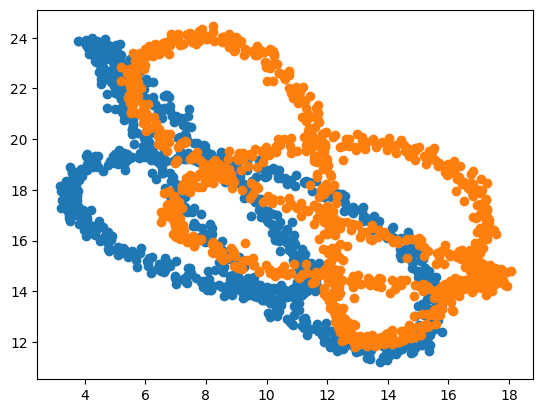

In [22]:
#Plot the 2 trajectories

plt.scatter(steps_of_1[:, 0], steps_of_1[:, 1])
plt.scatter(steps_of_2[:, 0], steps_of_2[:, 1])

plt.show()

In [23]:
#Performing PCA on the dataset
numbers_center, numbers_centered, U, sigma, Sigma, Vh, energy, explained_variance = own_PCA.perform_PCA(numbers)

1.0


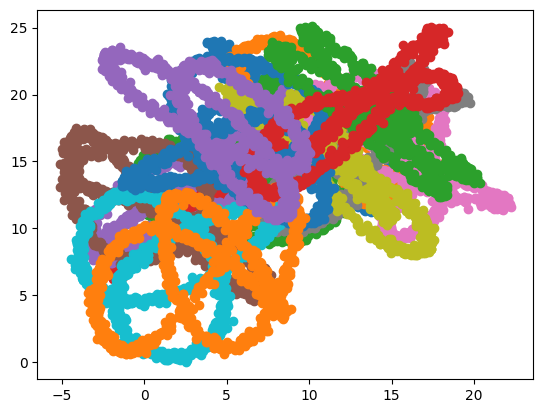

In [24]:
#(1) Perform PCA for the first 'a' = 30 components (all)
a = 30

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

0.4733056127498329


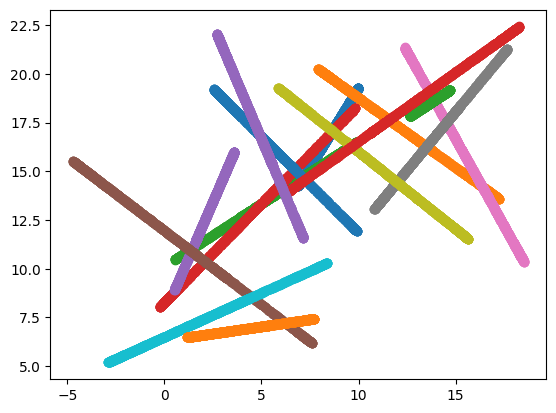

In [25]:
#(2) Perform PCA for the first 'a' = 1 components
a = 1

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

0.8492464226063752


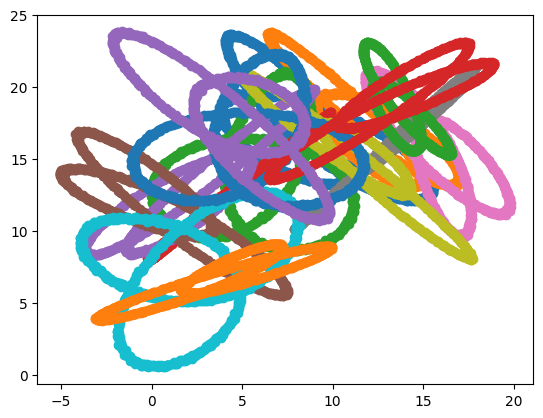

In [26]:
#(3) Perform PCA for the first 'a' = 2 components
a = 2

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

0.9971310341299295


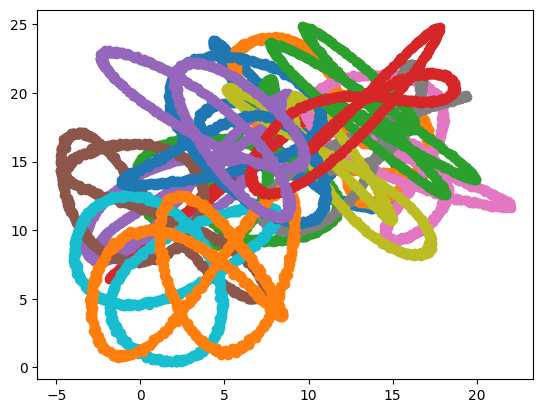

In [27]:
#(3) Perform PCA for the first 'a' = 3 components
a = 3

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

0.9972717366243777


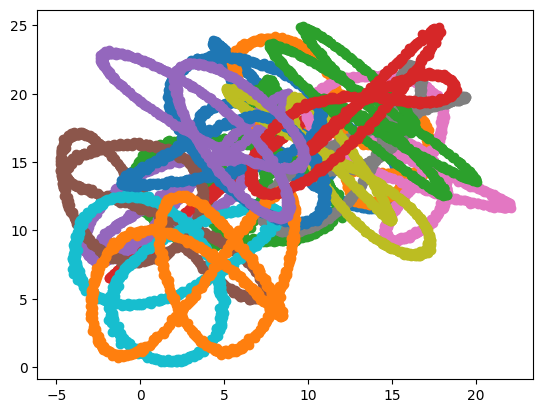

In [28]:
#(4) Perform PCA for the first 'a' = 4 components
a = 4

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

0.9980443830552844


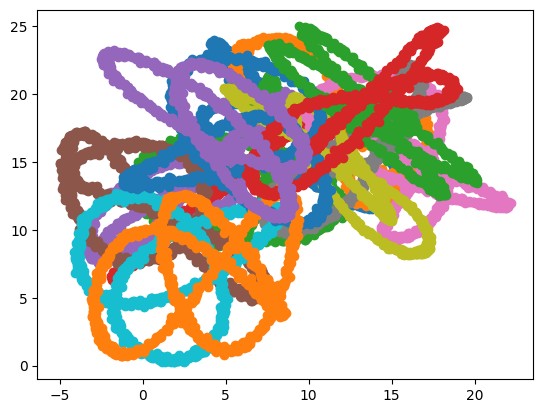

In [29]:
#(5) Perform PCA for the first 'a' = 11 components
a = 10

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

1.0


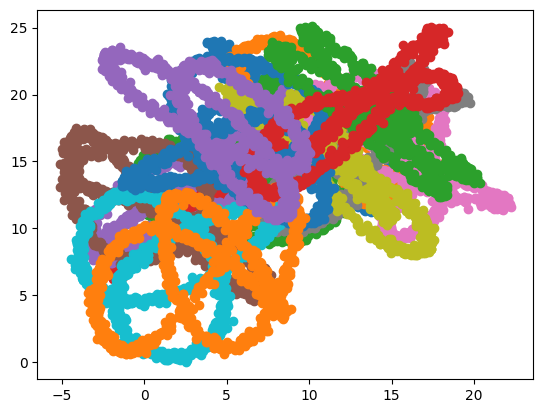

In [30]:
#(6) Perform PCA for the first 'a' = 29 components
a = 30

#Keeping only the first "a" principal components
new_numbers = own_PCA.truncate(U, Sigma, Vh, a)

#...re-centering it
new_numbers = own_PCA.recenter_data(new_numbers, numbers_center)

#Plotting the new paths for every pedestrian with different colors
own_PCA.plot_paths(plt, new_numbers)

#How much energy do we have now
print(explained_variance[a-1])

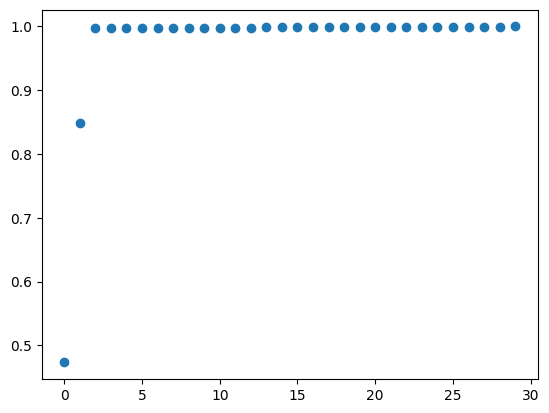

array([0.47330561, 0.84924642, 0.99713103, 0.99727174, 0.99740912,
       0.9975425 , 0.99767224, 0.99779965, 0.99792537, 0.99804438,
       0.99816037, 0.99827541, 0.99838897, 0.99850078, 0.99861018,
       0.99871873, 0.99882448, 0.99892824, 0.99902886, 0.99912732,
       0.99922498, 0.99931992, 0.99941206, 0.99950233, 0.99958945,
       0.99967542, 0.99976133, 0.99984473, 0.99992583, 1.        ])

In [31]:
#how the energy is kept according to how many PC-s we are keeping
plt.scatter(range(explained_variance.shape[0]), explained_variance)
plt.show()
explained_variance